***
<div class="alert alert-block alert-success">
<font color = '#006400'> 
    
# 1. Data Collection </font>    

Importing Libraries, reading Data and merging Datasets.
</div>

In [2]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Read Data
demographic = pd.read_excel("Telco_customer_churn_demographics.xlsx")
location = pd.read_excel("Telco_customer_churn_location.xlsx")
population = pd.read_excel("Telco_customer_churn_population.xlsx")
services = pd.read_excel("Telco_customer_churn_services.xlsx")
status = pd.read_excel("Telco_customer_churn_status.xlsx")

In [4]:
# Display
pd.set_option('display.max_columns', None)

display(demographic.head(2))
display(location.head(2))
display(population.head(2))
display(services.head(2))
display(status.head(2))

,Customer ID,Count,Gender,Age,Under 30,Senior Citizen,Married,Dependents,Number of Dependents
0,8779-QRDMV,1,Male,78,No,Yes,No,No,0
1,7495-OOKFY,1,Female,74,No,Yes,Yes,Yes,1


,Customer ID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude
0,8779-QRDMV,1,United States,California,Los Angeles,90022,"34.02381, -118.156582",34.023810,-118.156582
1,7495-OOKFY,1,United States,California,Los Angeles,90063,"34.044271, -118.185237",34.044271,-118.185237


,ID,Zip Code,Population
0,1,90001,54492
1,2,90002,44586


,Customer ID,Count,Quarter,Referred a Friend,Number of Referrals,Tenure in Months,Offer,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,Internet Service,Internet Type,Avg Monthly GB Download,Online Security,Online Backup,Device Protection Plan,Premium Tech Support,Streaming TV,Streaming Movies,Streaming Music,Unlimited Data,Contract,Paperless Billing,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue
0,8779-QRDMV,1,Q3,No,0,1,None,No,0.00,No,Yes,DSL,8,No,No,Yes,No,No,Yes,No,No,Month-to-Month,Yes,Bank Withdrawal,39.65,39.65,0.0,20,0.0,59.65
1,7495-OOKFY,1,Q3,Yes,1,8,Offer E,Yes,48.85,Yes,Yes,Fiber Optic,17,No,Yes,No,No,No,No,No,Yes,Month-to-Month,Yes,Credit Card,80.65,633.30,0.0,0,390.8,1024.10


,Customer ID,Count,Quarter,Satisfaction Score,Customer Status,Churn Label,Churn Value,Churn Score,CLTV,Churn Category,Churn Reason
0,8779-QRDMV,1,Q3,3,Churned,Yes,1,91,5433,Competitor,Competitor offered more data
1,7495-OOKFY,1,Q3,3,Churned,Yes,1,69,5302,Competitor,Competitor made better offer


In [5]:
del services['Count']
del status['Count']

In [6]:
# Merge the tables on "Customer ID"

df = demographic.merge(location, on='Customer ID', how='outer') \
                       .merge(services, on='Customer ID', how='outer') \
                       .merge(status, on='Customer ID', how='outer')

# Set "Customer ID" as an index

df.set_index('Customer ID', inplace = True)

# Display the first 2 rows of the merged table
display(df.head(2))

,Count_x,Gender,Age,Under 30,Senior Citizen,Married,Dependents,Number of Dependents,Count_y,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Quarter_x,Referred a Friend,Number of Referrals,Tenure in Months,Offer,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,Internet Service,Internet Type,Avg Monthly GB Download,Online Security,Online Backup,Device Protection Plan,Premium Tech Support,Streaming TV,Streaming Movies,Streaming Music,Unlimited Data,Contract,Paperless Billing,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Quarter_y,Satisfaction Score,Customer Status,Churn Label,Churn Value,Churn Score,CLTV,Churn Category,Churn Reason
Customer ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
8779-QRDMV,1,Male,78,No,Yes,No,No,0,1,United States,California,Los Angeles,90022,"34.02381, -118.156582",34.023810,-118.156582,Q3,No,0,1,None,No,0.00,No,Yes,DSL,8,No,No,Yes,No,No,Yes,No,No,Month-to-Month,Yes,Bank Withdrawal,39.65,39.65,0.0,20,0.0,59.65,Q3,3,Churned,Yes,1,91,5433,Competitor,Competitor offered more data
7495-OOKFY,1,Female,74,No,Yes,Yes,Yes,1,1,United States,California,Los Angeles,90063,"34.044271, -118.185237",34.044271,-118.185237,Q3,Yes,1,8,Offer E,Yes,48.85,Yes,Yes,Fiber Optic,17,No,Yes,No,No,No,No,No,Yes,Month-to-Month,Yes,Credit Card,80.65,633.30,0.0,0,390.8,1024.10,Q3,3,Churned,Yes,1,69,5302,Competitor,Competitor made better offer


In [7]:
# Check for duplicates
if df.duplicated().any():
    display(df[df.duplicated(keep=False)])
else:
    print("No duplicates found")

No duplicates found


  
<div class="alert alert-block alert-success">
<a id='explore'>
<font color = '#006400'> 
    
# 2. Data Exploration </font>
</a>

Understand the structure of the data and provide the first impressions of patterns, relations and errors.
    
</div>

### 2.1. Basic info and statistics

In [8]:
# Drop repeated columns "Count" and "Quarter"
df = df.drop(columns=['Quarter_x'])
df = df.rename(columns={'Quarter_y': 'Quarter'})

In [9]:
# Checking df general info in a dataframe

def df_info(data): 
    '''
    Returns a dataframe of .info() method, instead of its usual design
    
    Args: 
        data (panda dataframe) - data to analyse
    Returns: 
        pandas dataframe'''
    
    dtype_info = pd.DataFrame(data.dtypes).T.rename(index={0:'Column type'})
    missing_val_info = pd.DataFrame(data.isna().sum()).T.rename(index={0:'Count for missing values'})
    missing_val_percent_info = pd.DataFrame(data.isna().sum() / len(data)*100).T.rename(index={0:'Missing values (in %)'})
    
    tab_info = pd.concat([dtype_info, missing_val_info, missing_val_percent_info], axis=0)
    tab_info = tab_info.T.join(data.describe().T).fillna('-')
    
    return tab_info


display(df_info(df).style)

# Display shape of df:
print(f'\nThe DataFrame has {df.shape[1]} features with data from {df.shape[0]} rows.')

,Column type,Count for missing values,Missing values (in %),count,mean,std,min,25%,50%,75%,max
Count_x,int64,0,0.000000,7043.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000
Gender,object,0,0.000000,-,-,-,-,-,-,-,-
Age,int64,0,0.000000,7043.000000,46.509726,16.750352,19.000000,32.000000,46.000000,60.000000,80.000000
Under 30,object,0,0.000000,-,-,-,-,-,-,-,-
Senior Citizen,object,0,0.000000,-,-,-,-,-,-,-,-
Married,object,0,0.000000,-,-,-,-,-,-,-,-
Dependents,object,0,0.000000,-,-,-,-,-,-,-,-
Number of Dependents,int64,0,0.000000,7043.000000,0.468692,0.962802,0.000000,0.000000,0.000000,0.000000,9.000000
Count_y,int64,0,0.000000,7043.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000
Country,object,0,0.000000,-,-,-,-,-,-,-,-



The DataFrame has 52 features with data from 7043 rows.


In [10]:
# For qualitative features
df.describe(include='O').T

,count,unique,top,freq
Gender,7043,2,Male,3555
Under 30,7043,2,No,5642
Senior Citizen,7043,2,No,5901
Married,7043,2,No,3641
Dependents,7043,2,No,5416
Country,7043,1,United States,7043
State,7043,1,California,7043
City,7043,1106,Los Angeles,293
Lat Long,7043,1679,"33.362575, -117.299644",43
Referred a Friend,7043,2,No,3821


__Notes:__

> - There are __7043 rows__ (Clients) and __50 features__ <p>
> - There are __19 quantitative variables__ and __31 qualitative__ <p>
> - __Missing values:__ Churn Category (5174) and Churn reason (5174)  <p>
> - __Constant variables:__ Country and State have the unique values "United States" and "California" respectively; Quarter is always Q3 <p>
> - City has 1106 different values. But California only has 482 cities <p>
> - __Check if categoric values are acceptable:__ Offer has 6 possible values; Contract has 3 possivlue values; Payment Method has 3 possible values; Customer Status has 3 possible values; Churn Category has 5 possible values; Churn Reason has 20<p>
> - For age information we have two dummy variables: Under 30 and Senior Citizen <p>
> - Check if when Dependents is Yes then Number of Dependents is higher than 0 <p>

### 2.2. Further exploration 

__Skewness and Kurtosis__

> - __Skewness:__ Degree of asymmetry. Between -0.5 and 0.5 then is approx symmetric; 0 is symetric; between -1 and -0.5 or 0.5 and 1 is moderately skewed. Less than -1 or greater than 1 is highly skewed. <p>
> - __Kurtosis:__ Degree of peakedness. High kurtosis (>3) indicate a peaked distribution which could indicate the presence of outliers. <p>


__Notes:__
> - __Highly skewed:__ Number of Dependents, Number of Referrals, Avg Monthly GB Download, Total Refunds, Total Extra Data Charges, Total Long Distance Charges, Churv Value
> - __High kurtosis:__ Total Refunds, Number of Dependents, Total Extra Data Charges

In [11]:
# Compute skewness and kurtosis on numeric variables only
num_cols = df.select_dtypes(include=np.number).columns
tab_info4 = pd.DataFrame(df[num_cols].skew(), columns=['Skewness'])
tab_info5 = pd.DataFrame(df[num_cols].kurtosis(), columns=['Kurtosis'])
tab_info2 = pd.concat([tab_info4,tab_info5])
tab_info2

,Skewness,Kurtosis
Count_x,0.000000,NaN
Age,0.162186,NaN
Number of Dependents,2.109932,NaN
Count_y,0.000000,NaN
Zip Code,-0.209615,NaN
Latitude,0.314804,NaN
Longitude,-0.091932,NaN
Number of Referrals,1.446060,NaN
Tenure in Months,0.240543,NaN
Avg Monthly Long Distance Charges,0.049176,NaN


__Categorical Variables - Check levels/possible values__ <p>

In [12]:
# Variable Offer
df['Offer'].value_counts()

None       3877
Offer B     824
Offer E     805
Offer D     602
Offer A     520
Offer C     415
Name: Offer, dtype: int64

In [13]:
# Variable Contract
df['Contract'].value_counts()

Month-to-Month    3610
Two Year          1883
One Year          1550
Name: Contract, dtype: int64

In [14]:
# Variable Payment Method
df['Payment Method'].value_counts()

Bank Withdrawal    3909
Credit Card        2749
Mailed Check        385
Name: Payment Method, dtype: int64

In [15]:
# Variable Customer Status
df['Customer Status'].value_counts()

Stayed     4720
Churned    1869
Joined      454
Name: Customer Status, dtype: int64

> - Stayed: customers who continued with the service; <p>
> - Churned: customers who left the service; <p>
> - Joined: new customers who joined the service during the considered period

In [16]:
# Variable Churn Category
df['Churn Category'].value_counts()

Competitor         841
Attitude           314
Dissatisfaction    303
Price              211
Other              200
Name: Churn Category, dtype: int64

In [17]:
# Variable Churn Reason
df['Churn Reason'].value_counts()

Competitor had better devices                313
Competitor made better offer                 311
Attitude of support person                   220
Don't know                                   130
Competitor offered more data                 117
Competitor offered higher download speeds    100
Attitude of service provider                  94
Price too high                                78
Product dissatisfaction                       77
Network reliability                           72
Long distance charges                         64
Service dissatisfaction                       63
Moved                                         46
Extra data charges                            39
Limited range of services                     37
Poor expertise of online support              31
Lack of affordable download/upload speed      30
Lack of self-service on Website               29
Poor expertise of phone support               12
Deceased                                       6
Name: Churn Reason, 

### 2.3. Visual Exploration

<div class="alert alert-block alert-info">

Numerical Variables Distributions & Outliers Analysis
</div>

**Histograms**

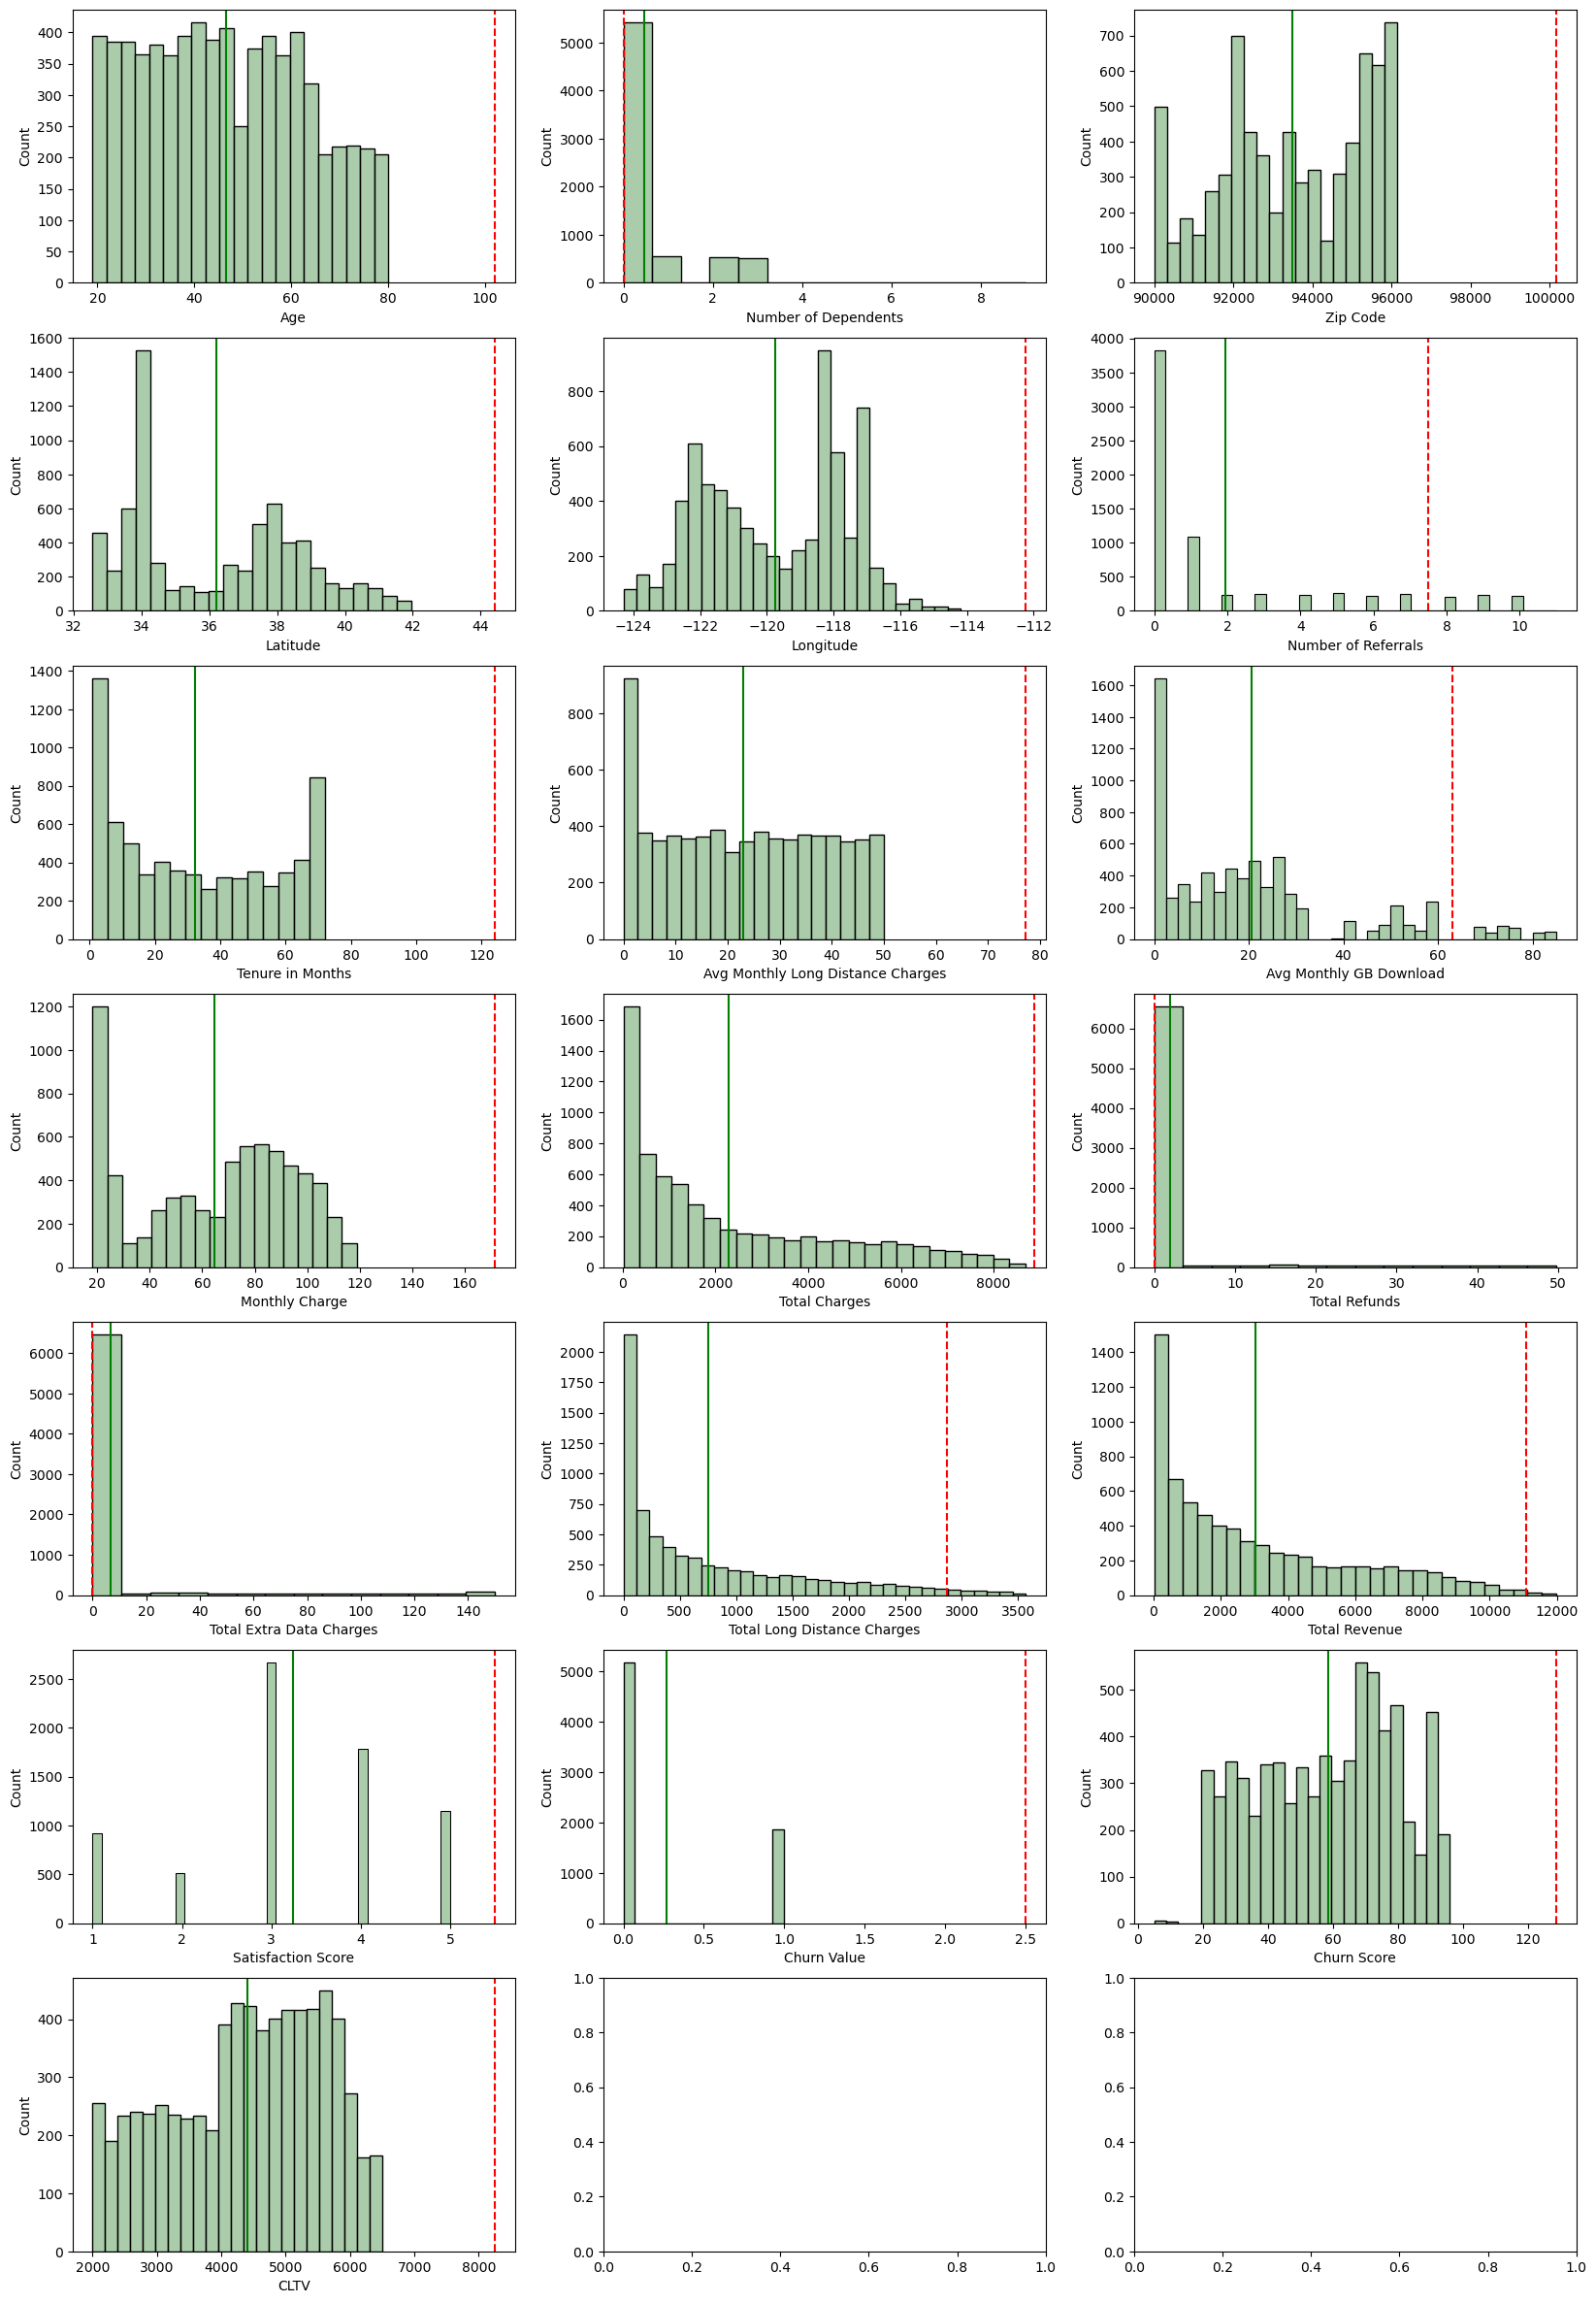

In [18]:
fig, axs = plt.subplots(nrows=7, ncols=3, figsize=(20, 30))

# Define the columns to plot
columns_numerical = columns_numerical = ['Age', 'Number of Dependents', 'Zip Code', 'Latitude', 'Longitude',  'Number of Referrals',  
'Tenure in Months',  'Avg Monthly Long Distance Charges', 'Avg Monthly GB Download', 'Monthly Charge', 'Total Charges', 'Total Refunds',
 'Total Extra Data Charges', 'Total Long Distance Charges', 'Total Revenue', 'Satisfaction Score', 'Churn Value','Churn Score', 'CLTV']

for i, col in enumerate(columns_numerical):
    sns.histplot(ax=axs[i//3][i%3], data=df, x=col, color='darkseagreen')
    axs[i//3][i%3].set_xlabel(col)

    # Mark the mean and the Q3 + 1.5IQR representing red vertical lines for each subplot
    axs[i//3][i%3].axvline(df[col].mean(), color='green')
    axs[i//3][i%3].axvline(df[col].quantile(0.75) + 1.5*(df[col].quantile(0.75) - df[col].quantile(0.25)), color='red', linestyle='--')

plt.show()

**Boxplots**

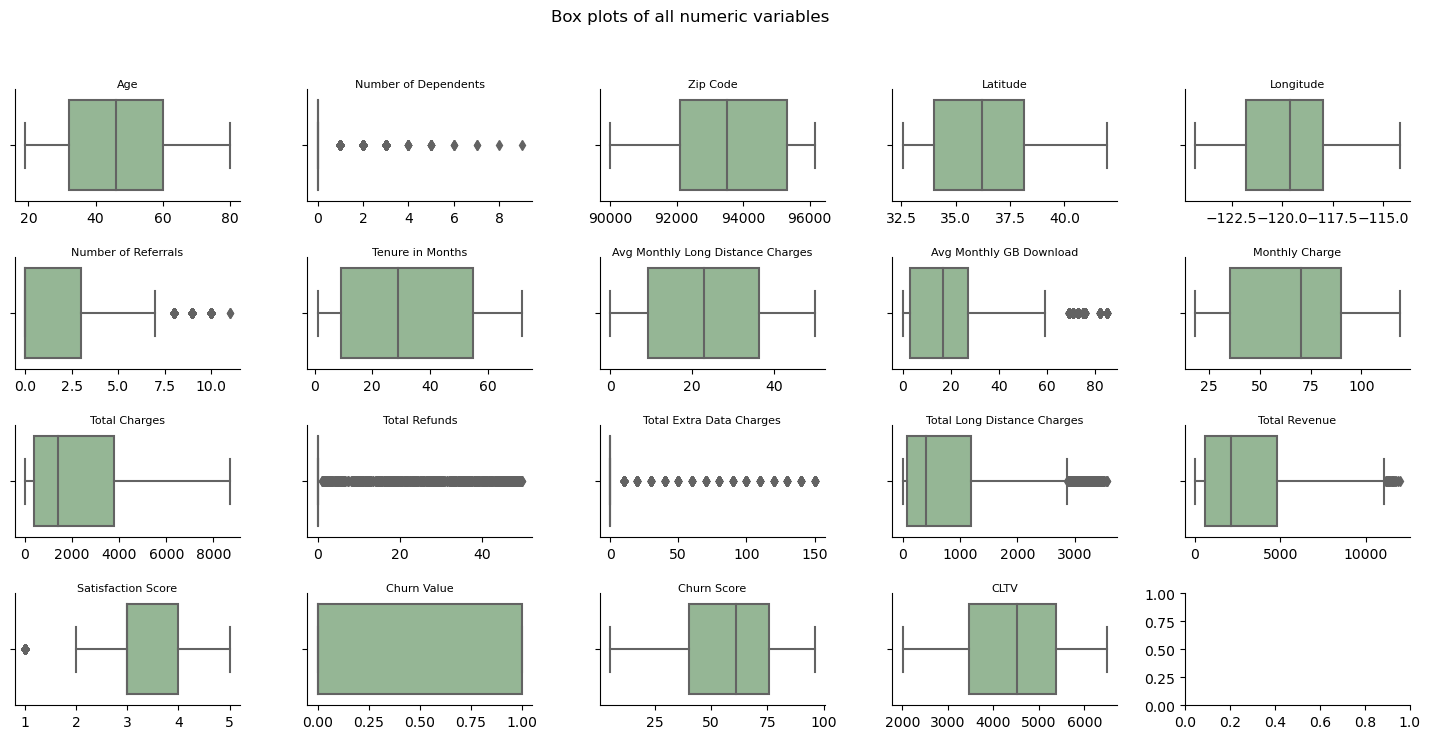

In [19]:
fig, ax = plt.subplots(4, 5, figsize=(18, 8))
for i, var in enumerate(df[['Age', 'Number of Dependents', 'Zip Code', 'Latitude', 'Longitude',  'Number of Referrals',  
'Tenure in Months',  'Avg Monthly Long Distance Charges', 'Avg Monthly GB Download', 'Monthly Charge', 'Total Charges', 'Total Refunds',
 'Total Extra Data Charges', 'Total Long Distance Charges', 'Total Revenue', 'Satisfaction Score', 'Churn Value','Churn Score', 'CLTV']]):

    if i < 22:
        subplot = ax.flatten()[i]
        g = sns.boxplot(data=df,
                        x=var,
                        ax=subplot,
                        color='darkseagreen')
        subplot.set_title(var, fontsize=8, pad=1)
        subplot.set_xlabel('')
sns.despine()
plt.subplots_adjust(hspace=0.5, wspace=0.3)
fig.suptitle("Box plots of all numeric variables", fontsize=12)
plt.show()

**Distribution graph**

C:\Users\saras\AppData\Local\Temp\ipykernel_13772\3146473271.py:11: UserWarning: This figure was using constrained_layout, but that is incompatible with subplots_adjust and/or tight_layout; disabling constrained_layout.
  plt.subplots_adjust(left=None, bottom=None, right=None, top=0.935, wspace=None, hspace=0.4)


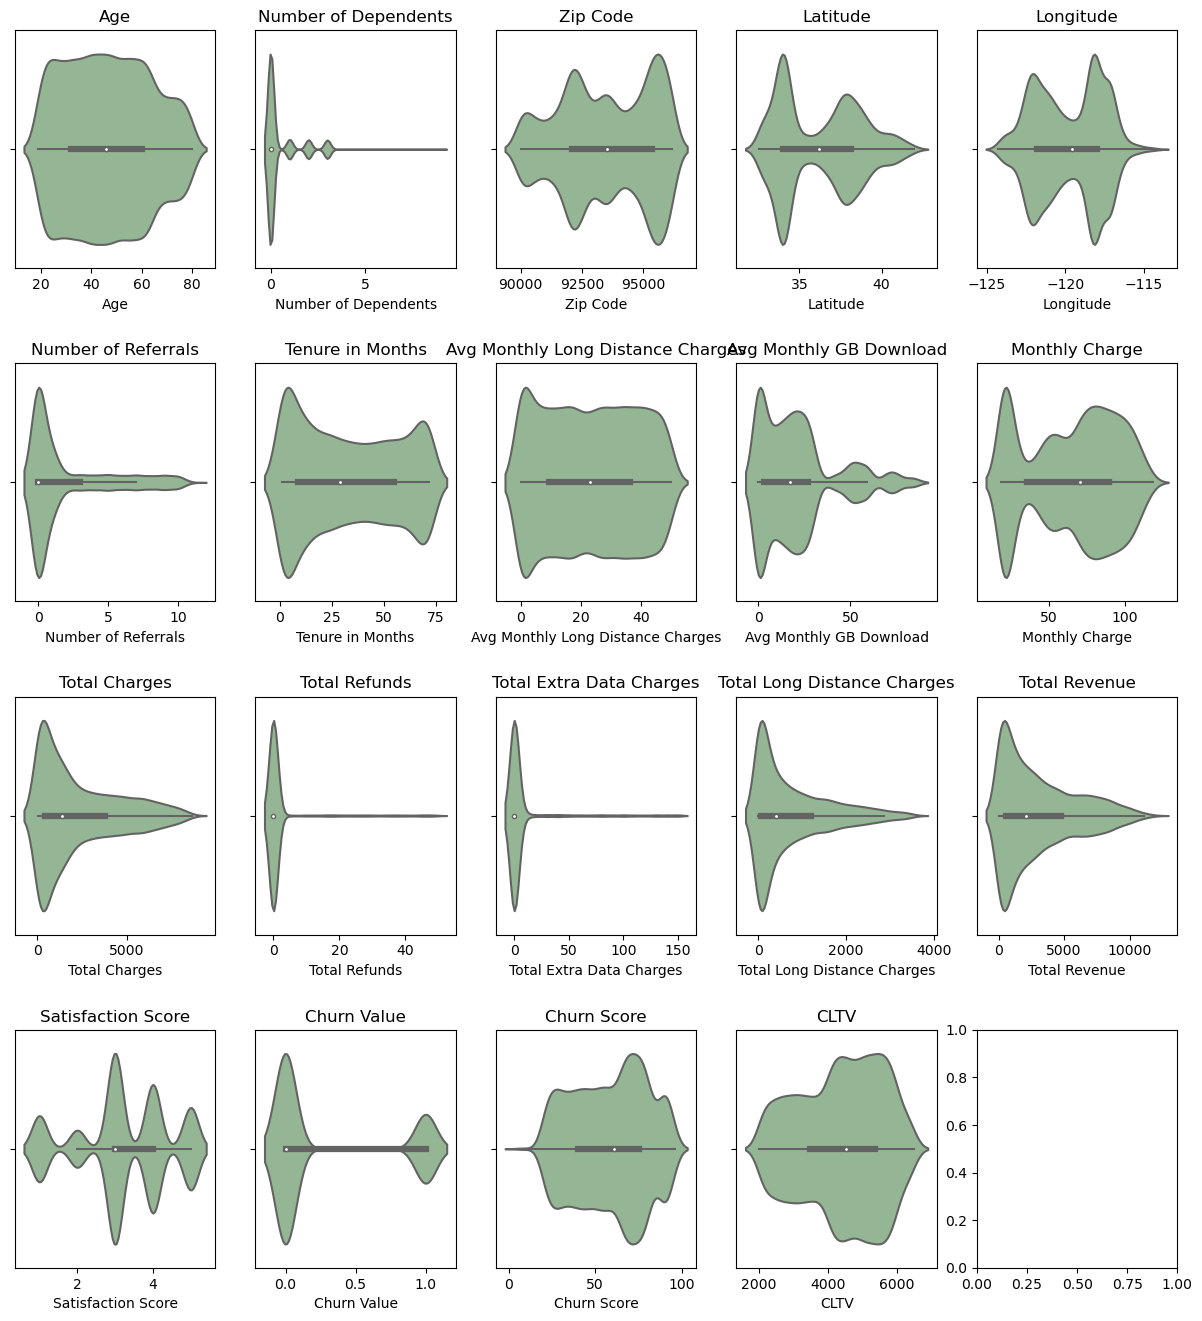

In [20]:
fig, axes = plt.subplots(nrows=4, ncols=5, figsize=(15,15), constrained_layout=True)

for ax, var in zip(axes.flatten(), df[['Age', 'Number of Dependents', 'Zip Code', 'Latitude', 'Longitude',  'Number of Referrals',  
'Tenure in Months',  'Avg Monthly Long Distance Charges', 'Avg Monthly GB Download', 'Monthly Charge', 'Total Charges', 'Total Refunds',
 'Total Extra Data Charges', 'Total Long Distance Charges', 'Total Revenue', 'Satisfaction Score', 'Churn Value','Churn Score', 'CLTV']]):
    sns.violinplot(x=var, data=df, ax=ax,color='darkseagreen')
    ax.set_title(var)
    ax.set_xlabel(var)

# Adjust the layout and show the figure
plt.subplots_adjust(left=None, bottom=None, right=None, top=0.935, wspace=None, hspace=0.4)
plt.show()

**Outliers: IQR approach**
> * The IQR method states that values locating outside the interval **[Q1 - 1.5 * IQR, Q1 + 1.5 * IQR] are outliers**
> * Because the data is sensitive, only extreme values with IQR test will be considered for this test __by using a criterion of 3__
> * The 3(IQR) criterion tells us that any observation that falls outside the decision range is considered an extreme outlier 

In [21]:
# How many outliers are there for each  numerical variable

numerical_cols = df.select_dtypes(include=np.number).columns # Select numerical columns

q1 = df[numerical_cols].quantile(0.25)
q3 = df[numerical_cols].quantile(0.75)
iqr = q3 - q1

lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

df_aligned, lower_bound_aligned = df.align(lower_bound, axis=1, copy=False) # Align DataFrame and Series before comparison
_, upper_bound_aligned = df.align(upper_bound, axis=1, copy=False)

outliers = (df_aligned < lower_bound_aligned).sum() + (df_aligned > upper_bound_aligned).sum() # Calculate the number of outliers for each variable

outliers_count = outliers[outliers > 0] # Filter and print only variables which have outliers

print(f'There are {len(outliers_count)} numerical variables with outliers (1.5*IQR):')
print(outliers_count.sort_values(ascending=False))

There are 8 numerical variables with outliers (1.5*IQR):
Number of Dependents           1627
Satisfaction Score              922
Total Extra Data Charges        728
Number of Referrals             676
Total Refunds                   525
Avg Monthly GB Download         362
Total Long Distance Charges     196
Total Revenue                    21
dtype: int64


In [22]:
# extreme outliers
extreme_outliers = (df_aligned < lower_bound_aligned - 3 * iqr).sum() + (df_aligned > upper_bound_aligned + 3 * iqr).sum() # Calculate the number of outliers for each variable

extreme_outliers_count = extreme_outliers[extreme_outliers > 0] # Filter and print only variables which have outliers

print(f'There are {len(extreme_outliers_count)} numerical variables with outliers (3*IQR):')
print(extreme_outliers_count.sort_values(ascending=False))

There are 3 numerical variables with outliers (3*IQR):
Number of Dependents        1627
Total Extra Data Charges     728
Total Refunds                525
dtype: int64


__Notes:__ 

> - Outliers (points outside the whiskers): <p>
> > -  Number of Referrals (part of the distribution) <p>
> > -  Avg Monthly GB Download (3 different distributions) <p>
> > -  Total Refunds, Total Extra Data Charges (weird distribution) <p>
> > -  Total Long Distance Charges, Total Revenue (distribution is highly skewed, outliers are part of it) <p>
> > -  Satisfaction Score (a few outliers of very low satisfaction) <p>

> - Variables 'Number of Dependents', 'Total Extra Data Charges', 'Total Refunds' show presence of **extreme outliers** (using 3*IQR criterion)   <p>



   

<div class="alert alert-block alert-info">

Numerical Variables - Correlations
    
</div>

__Spearman correlation between numerical variables:__ <p>
(data is not normally distributed)

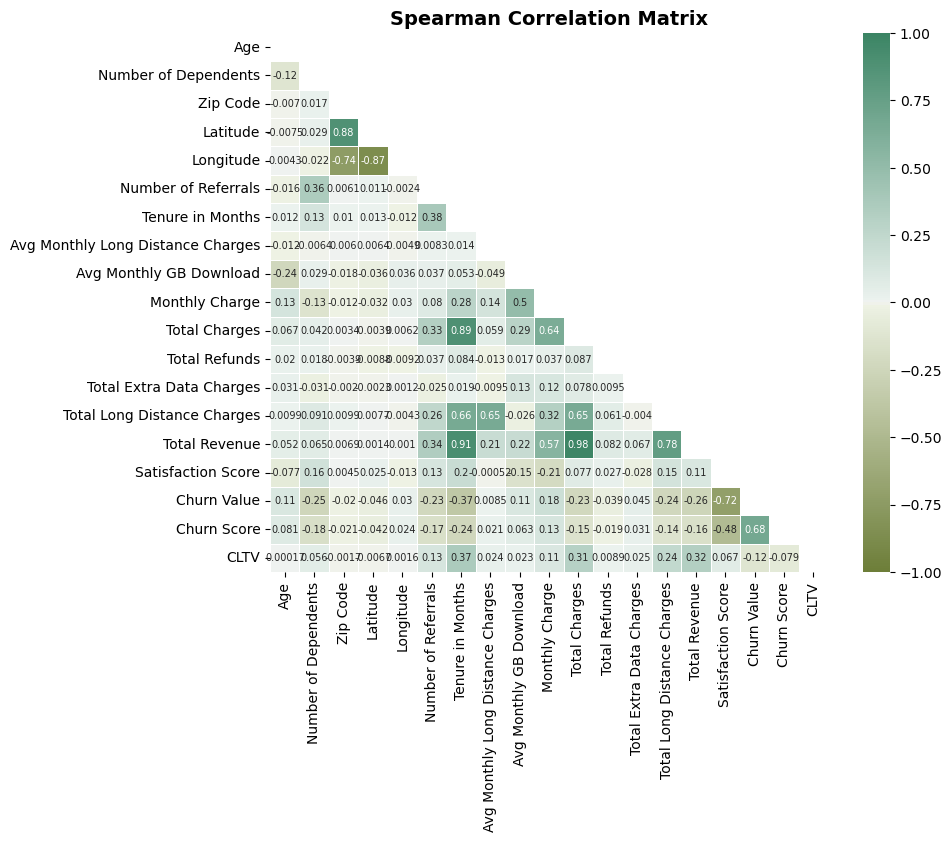

In [23]:
plt.figure(figsize=(9, 7))
custcmap = sns.diverging_palette(100, 150, as_cmap=True) 
corr = df[['Age', 'Number of Dependents', 'Zip Code', 'Latitude', 'Longitude',  'Number of Referrals',  
'Tenure in Months',  'Avg Monthly Long Distance Charges', 'Avg Monthly GB Download', 'Monthly Charge', 'Total Charges', 'Total Refunds',
 'Total Extra Data Charges', 'Total Long Distance Charges', 'Total Revenue', 'Satisfaction Score', 'Churn Value','Churn Score', 'CLTV']].corr(method='spearman')
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, annot=True, linewidths=0.5, cmap=custcmap, vmin=-1, vmax=1, mask=mask, annot_kws={"fontsize":7})
plt.title('Spearman Correlation Matrix', fontsize=14, fontweight='bold')
plt.show()

In [24]:
# Variables with correlation higher than 0.7
def corr_dict(df, threshold):
    df_corr = df.corr(method = 'spearman')
    corr_dict = {}
    for i in range(len(df_corr)):
        for j in range(i+1, len(df_corr)):
            if df_corr.iloc[i,j] >= threshold:
                if df_corr.columns[i] not in corr_dict:
                    corr_dict[df_corr.columns[i]] = [(df_corr.columns[j], df_corr.iloc[i,j])]
                else:
                    corr_dict[df_corr.columns[i]].append((df_corr.columns[j], df_corr.iloc[i,j]))
            elif df_corr.iloc[i,j] <= -threshold:
                if df_corr.columns[i] not in corr_dict:
                    corr_dict[df_corr.columns[i]] = [(df_corr.columns[j], df_corr.iloc[i,j])]
                else:
                    corr_dict[df_corr.columns[i]].append((df_corr.columns[j], df_corr.iloc[i,j]))
    return corr_dict

corr_dict(df[numerical_cols], 0.7)

{'Zip Code': [('Latitude', 0.8798232020426234),
  ('Longitude', -0.7415155022458879)],
 'Latitude': [('Longitude', -0.8695458835292985)],
 'Tenure in Months': [('Total Charges', 0.8894757959233502),
  ('Total Revenue', 0.9126474143808789)],
 'Total Charges': [('Total Revenue', 0.9783658853799454)],
 'Total Long Distance Charges': [('Total Revenue', 0.7775012768341926)],
 'Satisfaction Score': [('Churn Value', -0.7172652074308468)]}

__Notes:__ 

High correlations (>0.7) exist for the following variables (except Zip Code, Latitude & Longitude):<p>
>- Tenure in Months:
>>    - Total Charges
>>    - Total Revenue

If tenure is high (customer has been with the company for more months), then the more he can be charged and hence total revenue is also higher

>- Total Charges:
>>    - Total Revenue<p>

Same logic. More charges -> more revenue generates

>- Total Long Distance Charges:
>>    - Total Revenue<p>

If long-distance charges are high, customers ahave additionally chagers above those specified in their plan, which directly results in an increase in total revenue 

>- Satisfaction Score:
>>    - Churn Value<p>

Customers less satisfied are more likely to churn. Negative correlation might be expected.

<div class="alert alert-block alert-info">

Categorical Variables
    
</div>

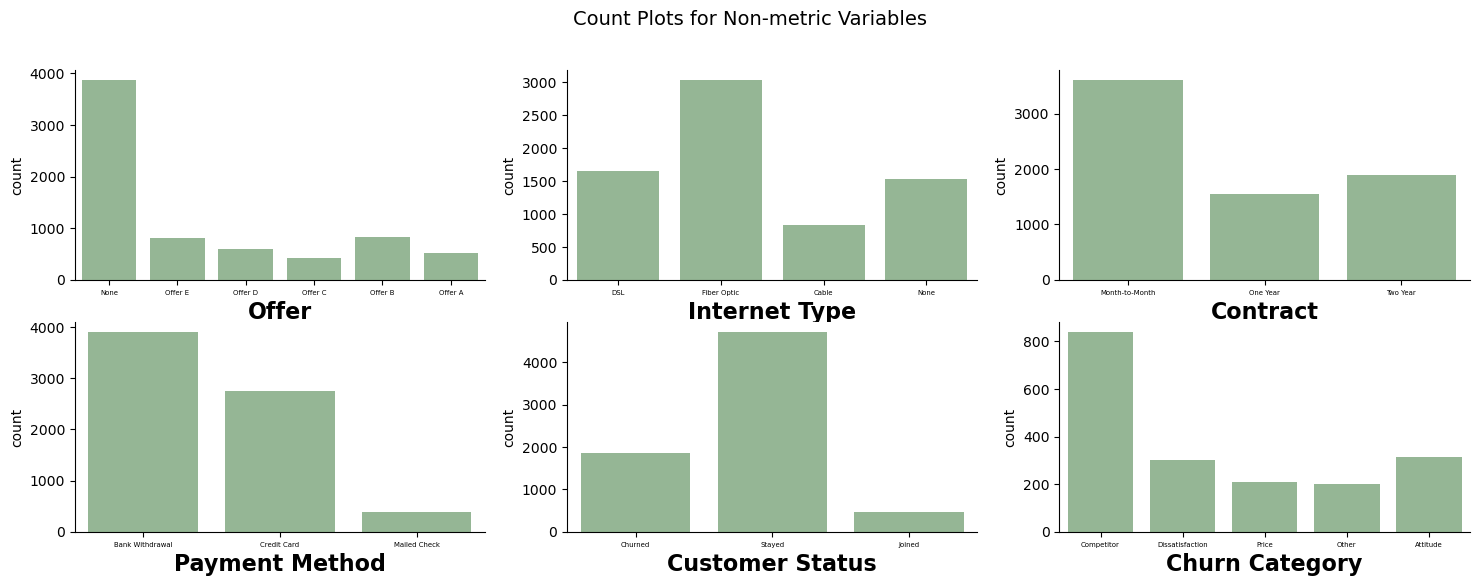

In [25]:
categorical_data = ['Offer', 'Internet Type', 'Contract', 'Payment Method','Customer Status', 'Churn Category']


# Count plots for non-numerical variables
fig, ax = plt.subplots(2, 3, figsize=(18, 6))
for var, subplot in zip(categorical_data, ax.flatten()):
    sns.countplot(data=df, x=var, ax=subplot, color='darkseagreen')
    subplot.set_xlabel(var.replace('_', ' '), fontsize=16, fontweight='bold')
    subplot.tick_params(axis='x', labelsize=5)

# Decoration
sns.despine()
fig.suptitle("Count Plots for Non-metric Variables", fontsize=14)
plt.show()

### 2.4. In-depth Exploration

#### 2.4.1  Churn Analysis Insights

##### Demographic Factors:

- **Gender**: Gender does not seem to significantly influence churn. Both males and females have comparable churn rates:
  - Female: 26.92%
  - Male: 26.16%

- **Age**: Customers under 30 years of age have a lower churn rate compared to those 30 and above:
  - Under 30: 21.70%
  - 30 and above: 27.74%

- **Marital Status**: Married customers have a noticeably lower churn rate:
  - Married: 19.66%
  - Not Married: 32.96%

- **Senior Citizen Status**: Senior citizens churn at a higher rate than non-senior citizens:
  - Senior Citizen: 41.68%
  - Not a Senior Citizen: 23.61%

- **Dependents**: Having dependents seems to have a strong influence on reducing churn:
  - With Dependents: 6.52%
  - Without Dependents: 32.55%

- **Referral**: Customers who were referred by a friend tend to churn less:
  - Referred: 19.37%
  - Not Referred: 32.58%

##### Service Factors:

- **Offers**: Among all the offers, Offer E stands out with the highest churn rate:
  - Offer E: 52.92%

- **Internet Service**: Having internet service is associated with a higher churn rate:
  - With Internet Service: 31.83%
  - Without Internet Service: 7.40%

- **Internet Type**: Among all internet types, Fiber Optic users show the highest churn:
  - Fiber Optic: 40.72%

- **Contract Duration**: Short-term contracts (month-to-month) have a significantly higher churn rate:
  - Month-to-Month: 45.84%

##### Payment Factors:

- **Payment Method**: Customers paying through mailed checks have the highest churn rate:
  - Mailed Check: 36.88%



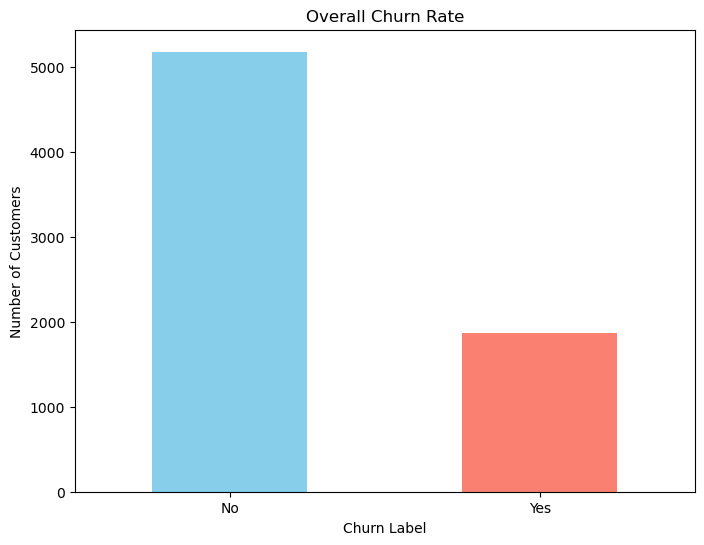

Overall churn rate: 26.54%
No     5174
Yes    1869
Name: Churn Label, dtype: int64


In [26]:
# Visualizing the overall churn rate
churn_counts = df['Churn Label'].value_counts()
plt.figure(figsize=(8, 6))
churn_counts.plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Overall Churn Rate')
plt.xlabel('Churn Label')
plt.ylabel('Number of Customers')
plt.xticks(rotation=0)
plt.show()

print(f'Overall churn rate: {round(churn_counts[1]/(churn_counts[0]+churn_counts[1])*100, 2)}%')
# print the values of yes and no
print(churn_counts)

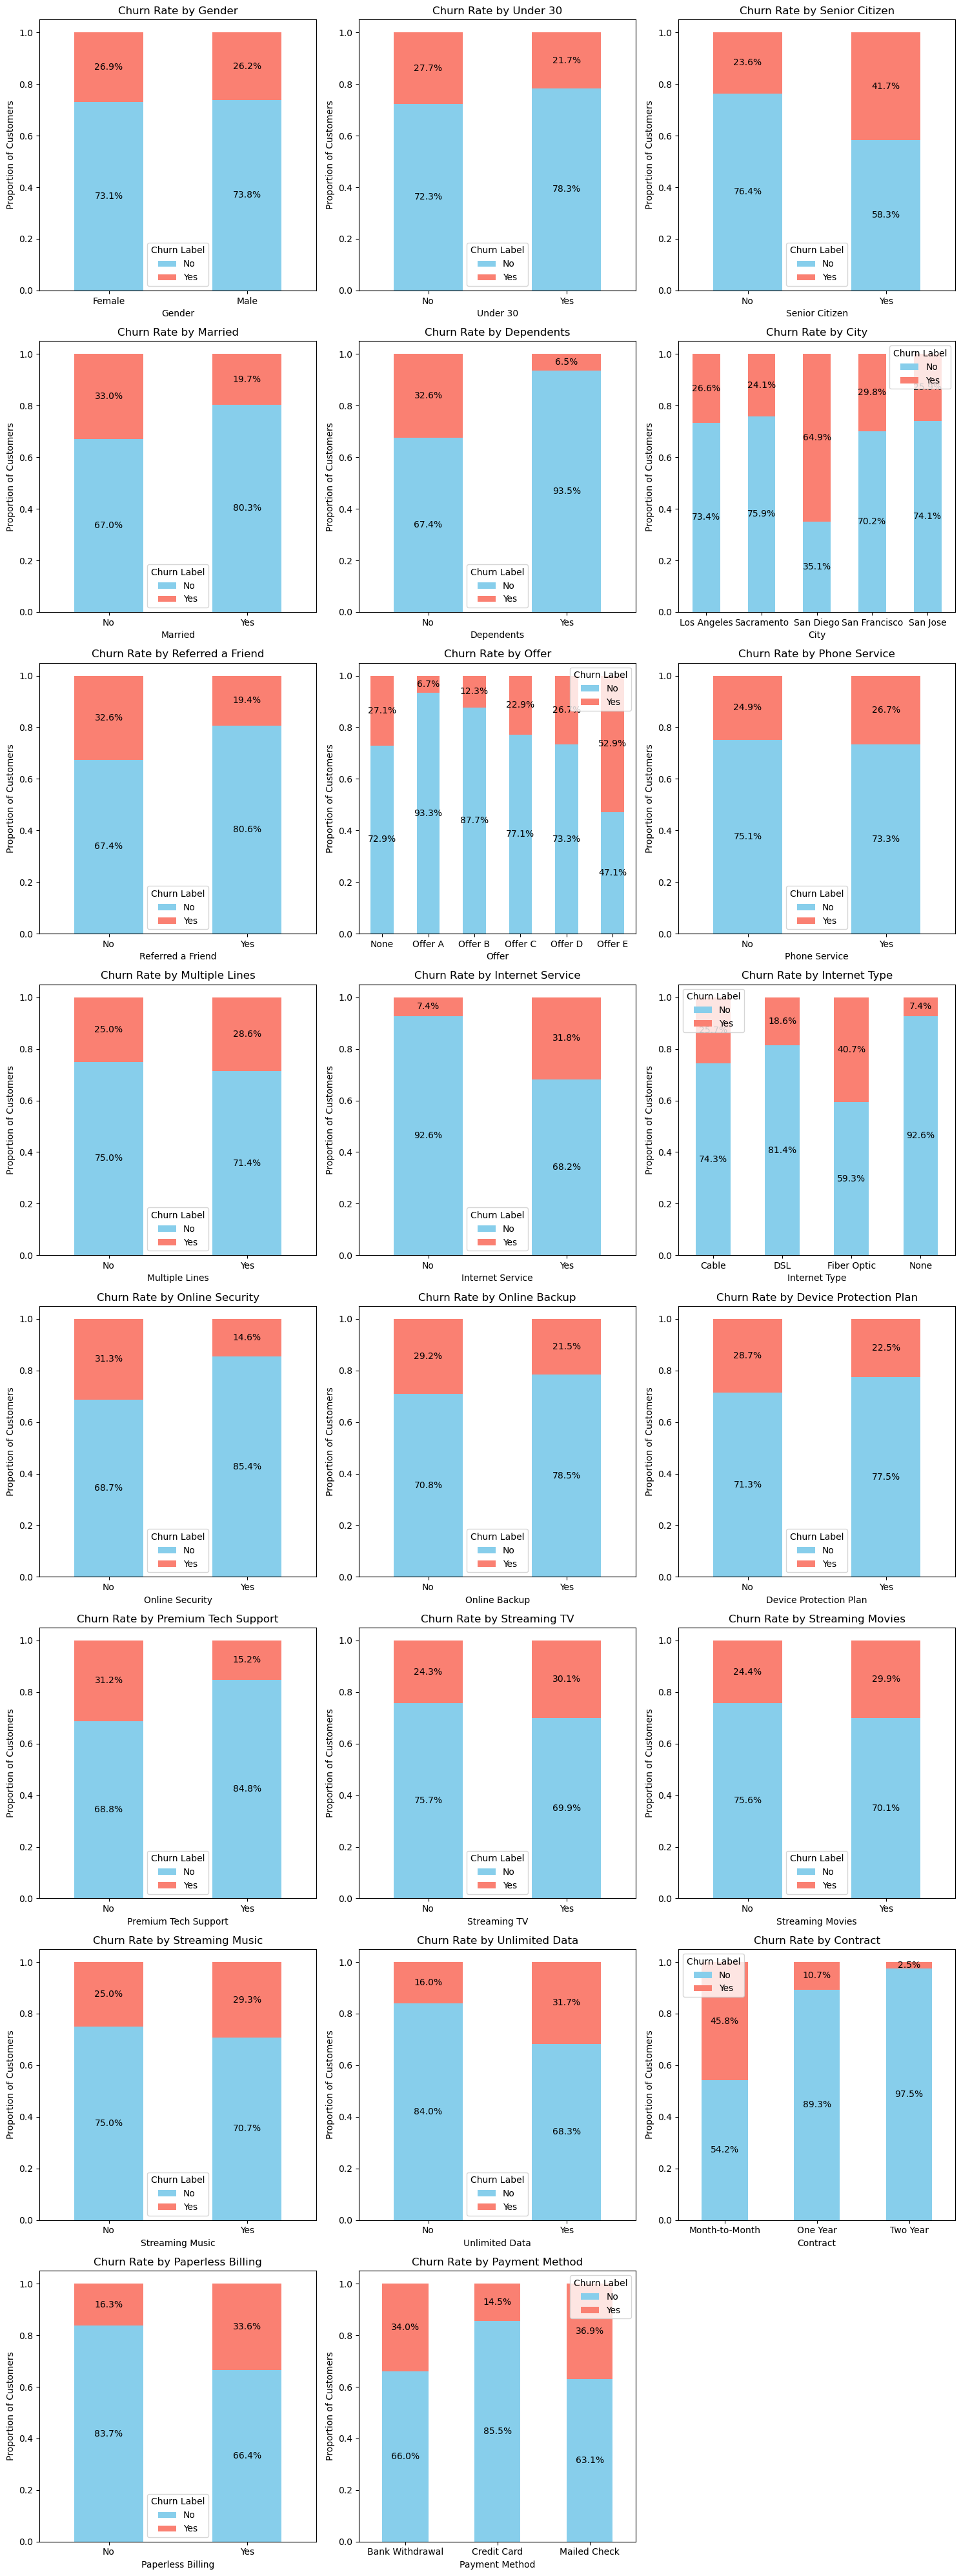

In [27]:
# Identify the top 5 cities by customer count
top5_cities = df['City'].value_counts().index[:5].tolist()

def plot_churn_by_multiple_features_annotated(features, titles):
    # Determine the number of rows required based on the number of features
    num_features = len(features)
    num_rows = -(-num_features // 3)  # Ceiling division
    
    # Create a grid of subplots
    fig, axes = plt.subplots(num_rows, 3, figsize=(15, 5 * num_rows))
    
    # If there's only one row, axes is a 1D array, so we reshape it for consistency
    if num_rows == 1:
        axes = axes.reshape(1, -1)
    
    # Loop over features and their corresponding titles to plot
    for idx, (feature, title) in enumerate(zip(features, titles)):
        row, col = divmod(idx, 3)
        
        # Filter data based on feature specifics
        data_subset = df
        if feature == 'City':
            data_subset = df[df['City'].isin(top5_cities)]
        
        churn_by_feature = data_subset.groupby(feature)['Churn Label'].value_counts(normalize=True).unstack()
        ax = churn_by_feature.plot(kind='bar', stacked=True, ax=axes[row, col], color=['skyblue', 'salmon'])
        axes[row, col].set_title(title)
        axes[row, col].set_ylabel('Proportion of Customers')
        axes[row, col].set_xticklabels(axes[row, col].get_xticklabels(), rotation=0)
        axes[row, col].legend(title='Churn Label')

        # Annotate the bars with their respective values
        for p in ax.patches:
            width, height = p.get_width(), p.get_height()
            x, y = p.get_xy() 
            ax.annotate(f'{height:.1%}', (x + width/2, y + height/2), ha='center', va='center')
    
    # Remove any unused subplots
    for idx in range(num_features, num_rows * 3):
        row, col = divmod(idx, 3)
        fig.delaxes(axes[row, col])
    
    plt.tight_layout()
    plt.show()


# Identify all categorical features excluding "Customer ID" and "Churn Label"
categorical_features = df.select_dtypes(include=['object', 'bool']).columns.tolist()

# Remove unwanted features and adjust the list of features and titles
excluded_features = ['Churn Label', 'Lat Long', 'Customer Status', 'Churn Category', 'Churn Reason', 'Country', 'Quarter', 'State']
features_to_plot = [feature for feature in categorical_features if feature not in excluded_features]
titles_to_plot = [f'Churn Rate by {feature}' for feature in features_to_plot]

plot_churn_by_multiple_features_annotated(features_to_plot, titles_to_plot)

#### 2.4.2.  Who Are Our Customers?

##### Demographic Insights:

- **Gender**: The distribution of customers based on gender is almost even:
  - Female: 49.52%
  - Male: 50.48%

- **Age Group**: A majority of the customers are above the age of 30:
  - Under 30: 19.89%
  - 30 and above: 80.11%

- **Marital Status**: The number of married and unmarried customers is fairly balanced:
  - Married: 48.30%
  - Not Married: 51.70%

- **Senior Citizen Status**: A significant majority of customers are not senior citizens:
  - Senior Citizen: 16.21%
  - Not a Senior Citizen: 83.79%

- **Dependents**: Many customers do not have dependents:
  - With Dependents: 23.10%
  - Without Dependents: 76.90%

##### City Insights:

The top 5 cities by customer count are:
1. Los Angeles
2. San Diego
3. San Jose
4. Sacramento
5. San Francisco

These cities constitute a substantial proportion of the customer base, with Los Angeles having the highest number of customers.

In [28]:
"""Plot Functions"""
def plot_demographics(features, titles):
    num_features = len(features)
    num_rows = -(-num_features // 3)  # Ceiling division
    
    # Create a grid of subplots
    fig, axes = plt.subplots(num_rows, 3, figsize=(15, 5 * num_rows))
    if num_rows == 1:
        axes = axes.reshape(1, -1)
    
    # Loop over features and their corresponding titles to plot
    for idx, (feature, title) in enumerate(zip(features, titles)):
        row, col = divmod(idx, 3)
        sns.countplot(data=df, x=feature, ax=axes[row, col], palette="pastel")
        axes[row, col].set_title(title)
        axes[row, col].set_ylabel('Number of Customers')
        axes[row, col].set_xlabel('')
    
    # Remove any unused subplots
    for idx in range(num_features, num_rows * 3):
        row, col = divmod(idx, 3)
        fig.delaxes(axes[row, col])
    
    plt.tight_layout()
    plt.show()


def plot_location(features, titles):
    num_features = len(features)
    num_rows = -(-num_features // 3)  # Ceiling division
    
    # Create a grid of subplots
    fig, axes = plt.subplots(num_rows, 3, figsize=(15, 5 * num_rows))
    if num_rows == 1:
        axes = axes.reshape(1, -1)
    
    # Loop over features and their corresponding titles to plot
    for idx, (feature, title) in enumerate(zip(features, titles)):
        row, col = divmod(idx, 3)
        
        if feature == 'City':
            # If there are too many cities, we'll show only the top 10 for clarity
            top_cities = df['City'].value_counts().index[:10]
            data_subset = df[df['City'].isin(top_cities)]
            sns.countplot(data=data_subset, x=feature, ax=axes[row, col], palette="pastel", order=top_cities)
        else:
            order = df[feature].value_counts().index  # order bars by value count
            sns.countplot(data=df, x=feature, ax=axes[row, col], palette="pastel", order=order)
            
        axes[row, col].set_title(title)
        axes[row, col].set_ylabel('Number of Customers')
        axes[row, col].set_xlabel('')
        if feature == 'City':
            axes[row, col].set_xticklabels(top_cities, rotation=45)
    
    # Remove any unused subplots
    for idx in range(num_features, num_rows * 3):
        row, col = divmod(idx, 3)
        fig.delaxes(axes[row, col])
    
    plt.tight_layout()
    plt.show()


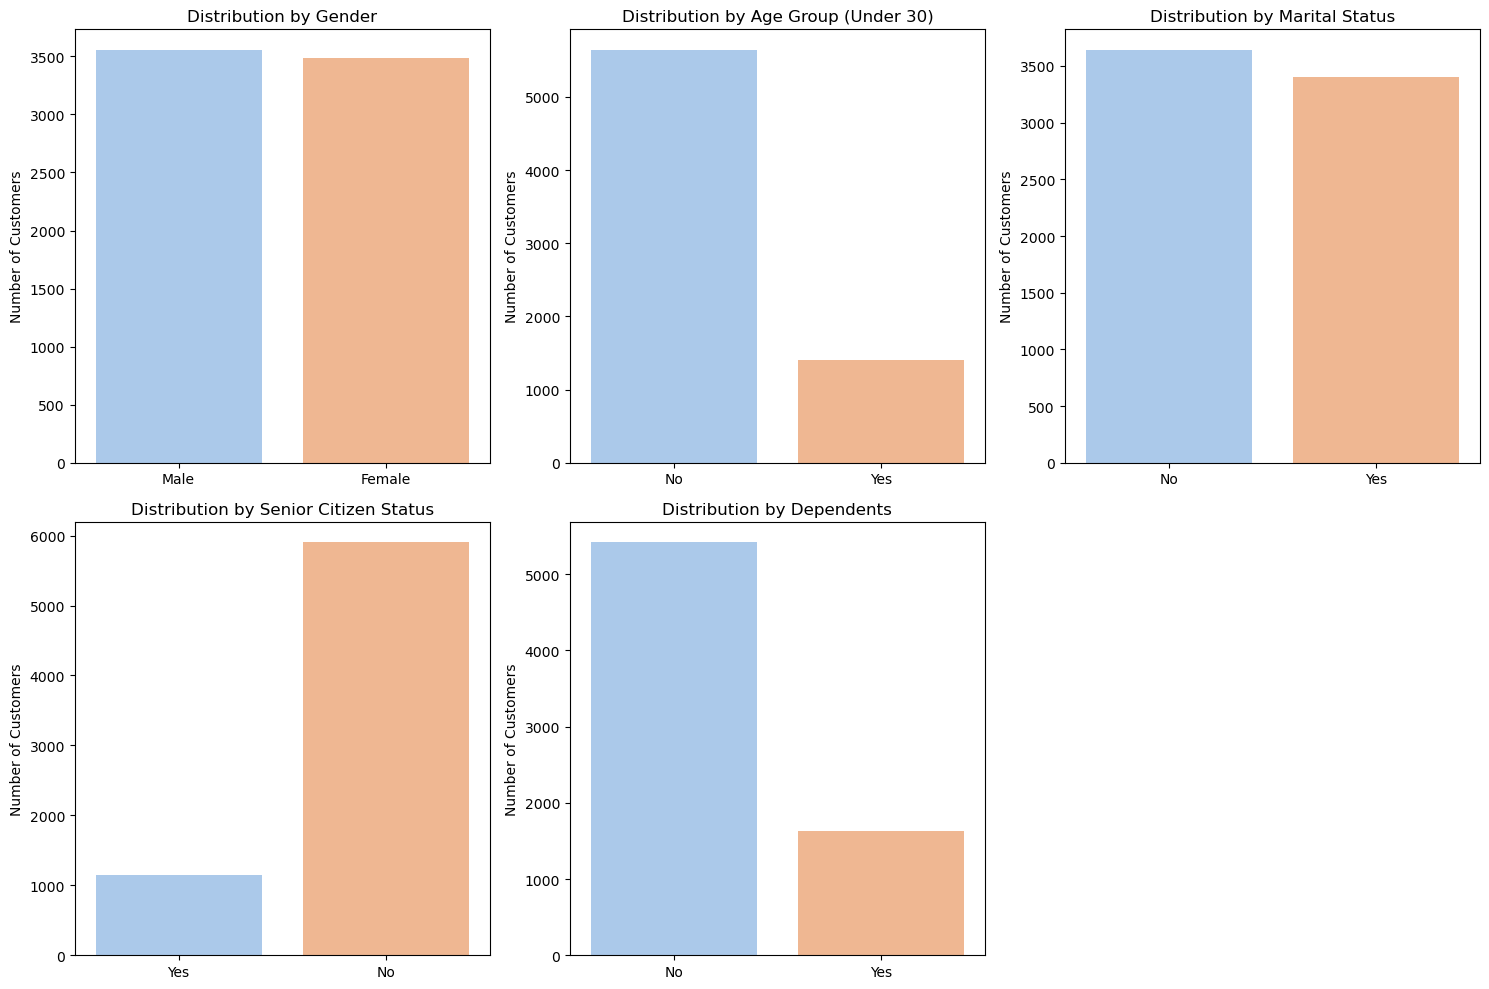

In [29]:
# Demographic features and their titles
demographic_features = ['Gender', 'Under 30', 'Married', 'Senior Citizen', 'Dependents']
demographic_titles = ['Distribution by Gender', 'Distribution by Age Group (Under 30)', 
                      'Distribution by Marital Status', 'Distribution by Senior Citizen Status', 
                      'Distribution by Dependents']

plot_demographics(demographic_features, demographic_titles)

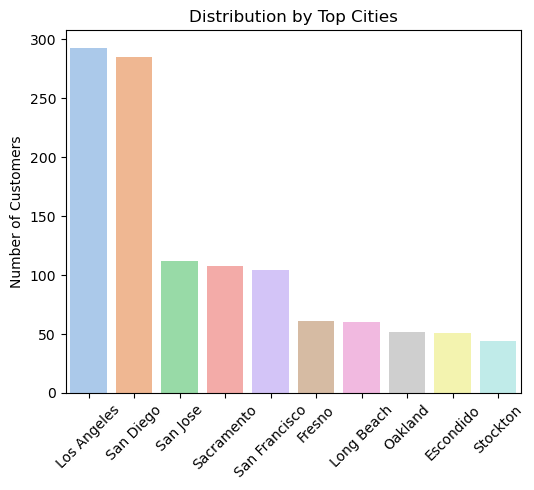

In [30]:
location_features = ['City']
location_titles = ['Distribution by Top Cities']
                   
# Let's test the updated functions by plotting the demographics and location distributions
plot_location(location_features, location_titles)

#### 2.4.3. Service offering & Revenue analysis

Which services are bought together? Bundling offering. <p>
Revenues & Charges Analysis: <p>

- Total Revenue = Total Charges - Total Refunds + Total Extra Data Charges + Total Long Distance Charges 

##### Bundling offering


In [31]:
from mlxtend.frequent_patterns import apriori, association_rules

# Filter the dataframe to include only the services of interest
services_of_interest = [
    'Phone Service', 'Internet Service', 'Online Security', 'Online Backup', 
    'Device Protection Plan', 'Premium Tech Support', 'Streaming TV', 
    'Streaming Movies', 'Streaming Music', 'Unlimited Data'
]
df_services_subset = df[services_of_interest]

# Convert the dataframe to a format suitable for Apriori
df_services_apriori = df_services_subset.applymap(lambda x: 1 if x == 'Yes' else 0)

# Generate frequent itemsets
frequent_itemsets = apriori(df_services_apriori, min_support=0.05, use_colnames=True)

# Generate association rules
rules = association_rules(frequent_itemsets, metric='lift', min_threshold=1)

# Filter rules to show only significant relationships (lift > 1 and confidence > 0.5)
bundling = rules[(rules['lift'] > 1) & (rules['confidence'] > 0.5)].sort_values(by='lift', ascending=False)

C:\Users\saras\AppData\Roaming\Python\Python39\site-packages\mlxtend\frequent_patterns\fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


In [32]:
bundling[bundling["confidence"]>0.7].sort_values(by='confidence', ascending=False).head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
818,"(Phone Service, Premium Tech Support, Online B...",(Internet Service),0.144115,0.783331,0.144115,1.0,1.2766,0.031225,inf,0.253152
12718,"(Online Security, Unlimited Data, Streaming Mo...",(Internet Service),0.107483,0.783331,0.107483,1.0,1.2766,0.023288,inf,0.242762
7310,"(Unlimited Data, Premium Tech Support, Online ...",(Internet Service),0.084481,0.783331,0.084481,1.0,1.2766,0.018304,inf,0.236663
29760,"(Streaming TV, Device Protection Plan, Unlimit...",(Internet Service),0.077950,0.783331,0.077950,1.0,1.2766,0.016889,inf,0.234986
12898,"(Device Protection Plan, Phone Service, Stream...",(Internet Service),0.062473,0.783331,0.062473,1.0,1.2766,0.013536,inf,0.231107
7280,"(Premium Tech Support, Online Security, Stream...",(Internet Service),0.057646,0.783331,0.057646,1.0,1.2766,0.012490,inf,0.229923
12838,"(Device Protection Plan, Phone Service, Stream...",(Internet Service),0.068579,0.783331,0.068579,1.0,1.2766,0.014859,inf,0.232622
12778,"(Streaming TV, Device Protection Plan, Phone S...",(Internet Service),0.068721,0.783331,0.068721,1.0,1.2766,0.014890,inf,0.232657
14776,"(Unlimited Data, Streaming Movies, Streaming M...",(Internet Service),0.122817,0.783331,0.122817,1.0,1.2766,0.026611,inf,0.247006
13260,"(Device Protection Plan, Unlimited Data, Strea...",(Internet Service),0.100383,0.783331,0.100383,1.0,1.2766,0.021750,inf,0.240846


In [33]:
bundling.to_excel('significant_rules.xlsx', index=False)

<div class="alert alert-block alert-success">
<font color = '#006400'> 
    
# 3. Data Pre Processing </font>
</a>
    
</div>

### 3.1. Misclassifications

In [34]:
# There are no misclassifications detected

### 3.2. Variables Creation (To brainstorm)

> 1 - __Tenure Groups__ - Derived from 'Tenure in Months' into groups like '0-6months', '7-12 months', etc. to help identify if newer customers are churning more than older ones <p>
> 2 - __Average Monthly Charges__ - 'Total Charges' divided by 'Tenure in Months' to give a clearer picture than the existing monthly charge <p>
> 3 - __Engagement Score__ - Create a score based on the number of services a customer has subscribed to. The more services, the higher the engagement score. <p>
> 4 - __Population Density__ - Segment zip codes into 'High', 'Medium', 'Low' based on population to help analyse if customers from densely populated areas behave differently<p>

Rates/constants:
> 5 - __Offer Acceptance Rate__ - Number of customers who accepted an offer divided by total customers (constant) <p>
> 6 - __Referral Rate__ - Number of successful referrals divided by number of referrals made <p>

Others: <p>
- bill shock to flag difference between two consecutive months' bills to see if there are big jumps<p>
- utilization rate = avg monthly gb downlod / limit set in their plan<p>

In [35]:
# 1 - Create Tenure Category variable based on this variable distribution
'''
- 0 - This quarter (joined) - 1-3 months
- 1 - > 3 months - 18 months (1 ano e meio)
- 2 - > 18 months - 36 months (1.5 - 3 anos)
- 3 - > 36 months - 54 months (3 anos - 4.5 anos)
- 4 - > 54 months - 72 months (4.5 anos - 6 anos)'''

bins = [0, 3, 18, 36, 54, 73]
df['Tenure Category'] = pd.cut(df['Tenure in Months'], bins=bins, labels=False, right=False)
df.insert(df.columns.get_loc('Tenure in Months') + 1, 'Tenure Category', df.pop('Tenure Category'))

In [36]:
# 2 - Create Average Monthly Charges per client

df['Average Monthly Charges per client'] = df['Total Charges'] / df['Tenure in Months']

In [37]:
# 3 - Create Engagement Score
'''
It adds +1 if the customer subscribes to each of the following services (have an associated fee):
- Phone Service
- Multiple Lines
- Internet Service
- Online Security
- Online Backup
- Device Protection Plan
- Premium Tech Support'''

# List of services to count
services_to_count = [
    'Phone Service',
    'Multiple Lines',
    'Internet Service',
    'Online Security',
    'Online Backup',
    'Device Protection Plan',
    'Premium Tech Support']

# Define a function to calculate the Engagement Score based on services subscribed to
def calculate_engagement_score(row):
    score = sum(1 for service in services_to_count if row[service] == 'Yes')
    return score

# Apply the function to create the 'Engagement Score' column
df['Engagement Score'] = df.apply(calculate_engagement_score, axis=1)

In [38]:
# 4 - Create Population Density based on Zip Codes and Population

# WIP falta juntar Population

### 3.3. Encoding categorical variables

> Ordinal encoding (ranking preserving ordinal relationship) and create dummy variables (variables  without a natural order or ranking among their categories) <p>


Dummy variables:

- Customer Status -> New Customer - 1 if "Joined", 0 otherwise
- All columns with Yes and No

Ordinal encoding:

- Contract:<p>
    -"month-to-month" could be encoded as 1.<p>
    -"one year" could be encoded as 2.<p>
    -"two year" could be encoded as 3.<p>

Dummy but first separate in different columns:
- Offer
- Internet Type
- Churn Category
-Gender

In [39]:
# Dummy variables

columns_to_dummify = ['Gender', 'Under 30', 'Senior Citizen', 'Married', 'Dependents', 'Referred a Friend',
                      'Phone Service', 'Multiple Lines', 'Internet Service', 'Online Security', 'Online Backup',
                      'Device Protection Plan', 'Premium Tech Support', 'Streaming TV', 'Streaming Movies',
                      'Streaming Music', 'Unlimited Data', 'Paperless Billing', 'Churn Label']

df[columns_to_dummify] = df[columns_to_dummify].replace({'Yes': 1, 'No': 0})


# Customer Status variable - replace "Joined" with 1 and all other values with 0 in the "Customer Status" column and this column will be called New Customer 
df.rename(columns={'Customer Status': 'New Customer'}, inplace=True)
df['New Customer'] = df['New Customer'].replace({'Joined': 1, 'Stayed': 0, 'Churned': 0})

In [40]:
# Contract variable encoded as follows
contract_mapping = {
    'Month-to-Month': 1,
    'One Year': 2,
    'Two Year': 3,
}

# Create a new column "Contract Encoded" based on the mapping
df['Contract'] = df['Contract'].map(contract_mapping)

In [41]:
# Create dummies from variables with several labels

# Gender
df = pd.get_dummies(df, columns=["Gender"], prefix=["Gender"], drop_first=True)

# Offer variable, drop out None
df = pd.get_dummies(df, columns=["Offer"], prefix=["Offer"])
df.drop("Offer_None", axis=1, inplace=True)


# Internet Type
df = pd.get_dummies(df, columns=["Internet Type"], prefix=["Internet Type"])
df.drop("Internet Type_None", axis=1, inplace=True)

#Payment Method
df = pd.get_dummies(df, columns=["Payment Method"], prefix=["Payment Method"])
df.drop("Payment Method_Mailed Check", axis=1, inplace=True)

#Churn Category
df = pd.get_dummies(df, columns=["Churn Category"], prefix=["Churn Category"])
df.drop("Churn Category_Other", axis=1, inplace=True)   

### 3.4. Delete variables

> Constant variables <p>

- Country<p>
- State <p>
- Quarter <p>

Repeated variable:
- Churn Value can be dropped as Churn Label provides the same information

In [42]:
# Drop columns
columns_to_drop = ["Country", "State", "Quarter", "Churn Value"]
df.drop(columns=columns_to_drop, inplace=True)

### 3.4. Final df & export


In [43]:
df

,Count_x,Age,Under 30,Senior Citizen,Married,Dependents,Number of Dependents,Count_y,City,Zip Code,Lat Long,Latitude,Longitude,Referred a Friend,Number of Referrals,Tenure in Months,Tenure Category,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,Internet Service,Avg Monthly GB Download,Online Security,Online Backup,Device Protection Plan,Premium Tech Support,Streaming TV,Streaming Movies,Streaming Music,Unlimited Data,Contract,Paperless Billing,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Satisfaction Score,New Customer,Churn Label,Churn Score,CLTV,Churn Reason,Average Monthly Charges per client,Engagement Score,Gender_Male,Offer_Offer A,Offer_Offer B,Offer_Offer C,Offer_Offer D,Offer_Offer E,Internet Type_Cable,Internet Type_DSL,Internet Type_Fiber Optic,Payment Method_Bank Withdrawal,Payment Method_Credit Card,Churn Category_Attitude,Churn Category_Competitor,Churn Category_Dissatisfaction,Churn Category_Price
Customer ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
8779-QRDMV,1,78,0,1,0,0,0,1,Los Angeles,90022,"34.02381, -118.156582",34.023810,-118.156582,0,0,1,0,0,0.00,0,1,8,0,0,1,0,0,1,0,0,1,1,39.65,39.65,0.00,20,0.00,59.65,3,0,1,91,5433,Competitor offered more data,39.650000,2,1,0,0,0,0,0,0,1,0,1,0,0,1,0,0
7495-OOKFY,1,74,0,1,1,1,1,1,Los Angeles,90063,"34.044271, -118.185237",34.044271,-118.185237,1,1,8,1,1,48.85,1,1,17,0,1,0,0,0,0,0,1,1,1,80.65,633.30,0.00,0,390.80,1024.10,3,0,1,69,5302,Competitor made better offer,79.162500,4,0,0,0,0,0,1,0,0,1,0,1,0,1,0,0
1658-BYGOY,1,71,0,1,0,1,3,1,Los Angeles,90065,"34.108833, -118.229715",34.108833,-118.229715,0,0,18,2,1,11.33,1,1,52,0,0,0,0,1,1,1,1,1,1,95.45,1752.55,45.61,0,203.94,1910.88,2,0,1,81,3179,Competitor made better offer,97.363889,3,1,0,0,0,1,0,0,0,1,1,0,0,1,0,0
4598-XLKNJ,1,78,0,1,1,1,1,1,Inglewood,90303,"33.936291, -118.332639",33.936291,-118.332639,1,1,25,2,1,19.76,0,1,12,0,1,1,0,1,1,0,1,1,1,98.50,2514.50,13.43,0,494.00,2995.07,2,0,1,88,5337,Limited range of services,100.580000,4,0,0,0,1,0,0,0,0,1,1,0,0,0,1,0
4846-WHAFZ,1,80,0,1,1,1,1,1,Whittier,90602,"33.972119, -118.020188",33.972119,-118.020188,1,1,37,3,1,6.33,1,1,14,0,0,0,0,0,0,0,1,1,1,76.50,2868.15,0.00,0,234.21,3102.36,2,0,1,67,2793,Extra data charges,77.517568,3,0,0,0,1,0,0,0,0,1,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2569-WGERO,1,30,0,0,0,0,0,1,Landers,92285,"34.341737, -116.539416",34.341737,-116.539416,0,0,72,4,1,22.77,0,0,0,0,0,0,0,0,0,0,0,3,1,21.15,1419.40,19.31,0,1639.44,3039.53,5,0,0,45,5306,NaN,19.713889,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
6840-RESVB,1,38,0,0,1,1,2,1,Adelanto,92301,"34.667815, -117.536183",34.667815,-117.536183,1,1,24,2,1,36.05,1,1,24,1,0,1,1,1,1,1,1,2,1,84.80,1990.50,48.23,0,865.20,2807.47,3,0,0,59,2140,NaN,82.937500,6,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0
2234-XADUH,1,30,0,0,1,1,2,1,Amboy,92304,"34.559882, -115.637164",34.559882,-115.637164,1,4,72,4,1,29.66,1,1,59,0,1,1,0,1,1,1,1,2,1,103.20,7362.90,45.38,0,2135.52,9453.04,4,0,0,71,5560,NaN,102.262500,5,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0


In [44]:
# Export to csv.
df.to_csv('df_preprocessed.csv')